<a href="https://colab.research.google.com/github/ali-kin4/JupyterNotes-1/blob/main/FBProphet_prediction_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
name = 'HiWeb'

#### Install yfinance

In [ ]:
!pip install yfinance

# Forecasting Stocks from Yahoo Finance with Prophet

In [ ]:
import yfinance as yf

name = 'BNB-USD'

# berkshire hathaway inc. (b stock)
brk = yf.Ticker(name)
 
hist = brk.history(period="max", auto_adjust=True)
 
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-07-25,0.115203,0.115841,0.101531,0.105870,145269,0,0
2017-07-26,0.105893,0.109013,0.099266,0.105138,200395,0,0
2017-07-27,0.105108,0.108479,0.100888,0.107737,344499,0,0
2017-07-28,0.107632,0.109019,0.101473,0.104067,342568,0,0
2017-07-29,0.104782,0.111264,0.101108,0.107811,340218,0,0
...,...,...,...,...,...,...,...
2021-04-20,503.795166,588.064819,475.590393,587.029114,9330924061,0,0
2021-04-21,586.901184,612.687073,537.349365,546.023560,8456300946,0,0
2021-04-22,544.005493,582.037720,481.260223,506.013000,8342960849,0,0


In [ ]:
import pandas as pd

hist = pd.read_csv('/content/hiweb.csv')
hist.set_index("Date", inplace = True)

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['<CLOSE>'].values

df.tail()

,ds,y
592,2021-04-14,10510.0
593,2021-04-17,10510.0
594,2021-04-18,10510.0
595,2021-04-19,10510.0
596,2021-04-20,10510.0


In [ ]:
from fbprophet import Prophet
 
m = Prophet(daily_seasonality=False)
 
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
future = m.make_future_dataframe(60, freq='D')
 
forecast = m.predict(future)
 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
650,2021-06-13,10675.462698,7998.378878,13041.860923
651,2021-06-14,10735.188110,8090.033201,13466.586816
652,2021-06-15,10587.063563,7890.394809,13079.687939
653,2021-06-16,10357.565961,7701.682367,13036.727905
654,2021-06-17,10160.023455,7598.106423,12859.069638
655,2021-06-18,9941.776780,7178.806201,12487.293991
656,2021-06-19,9783.428545,7289.967027,12394.426949


## Make it a Function

In [1]:
def make_forecast_by_file(filename, periods, hist='max'):
  """
  forecast the given ticker (stock) period days into the future (from today)

  inputs
  ------
  > ticker
      >> ticker of stock to forecast
  > periods
      >> number of days into the future to forecast (from today's date)
  > hist
      >> amount of historical data to consider
          > default: max
          > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
  """

  hist_data = pd.read_csv(filename)
  hist_data.set_index("Data", inplace = True)

  # create new dataframe to hold dates (ds) & adjusted closing prices (y)
  df = pd.DataFrame()

  df['ds'] = hist_data.index.values
  df['y'] = hist_data['Close'].values

  # create a Prophet model from that data
  m = Prophet(daily_seasonality=False)
  m.fit(df)

  future = m.make_future_dataframe(periods, freq='D')

  forecast = m.predict(future)

  m.plot(forecast)
  plt.title("{} Price Prediction".format(name))
  plt.savefig("{}.png".format(name), dpi = 600)

  return forecast

In [ ]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-05,15.318792,14.020322,16.051566,15.318792,15.318792,-0.298613,-0.298613,-0.298613,-0.057340,-0.057340,-0.057340,-0.241273,-0.241273,-0.241273,0.0,0.0,0.0,15.020179
1,2017-05-08,15.314102,14.076751,16.020386,15.314102,15.314102,-0.243114,-0.243114,-0.243114,-0.051666,-0.051666,-0.051666,-0.191448,-0.191448,-0.191448,0.0,0.0,0.0,15.070988
2,2017-05-09,15.312539,14.045726,16.081812,15.312539,15.312539,-0.209539,-0.209539,-0.209539,-0.040723,-0.040723,-0.040723,-0.168817,-0.168817,-0.168817,0.0,0.0,0.0,15.103000
3,2017-05-10,15.310976,14.124021,16.087476,15.310976,15.310976,-0.208817,-0.208817,-0.208817,-0.064893,-0.064893,-0.064893,-0.143924,-0.143924,-0.143924,0.0,0.0,0.0,15.102158
4,2017-05-11,15.309413,14.113635,16.176072,15.309413,15.309413,-0.176281,-0.176281,-0.176281,-0.059010,-0.059010,-0.059010,-0.117271,-0.117271,-0.117271,0.0,0.0,0.0,15.133132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,2021-10-16,21.674024,20.385409,23.119781,20.763481,22.553648,0.081419,0.081419,0.081419,0.136816,0.136816,0.136816,-0.055397,-0.055397,-0.055397,0.0,0.0,0.0,21.755444
1175,2021-10-17,21.687936,20.469989,23.120178,20.769586,22.577962,0.071121,0.071121,0.071121,0.136816,0.136816,0.136816,-0.065695,-0.065695,-0.065695,0.0,0.0,0.0,21.759058
1176,2021-10-18,21.701848,20.176349,22.875344,20.773064,22.600139,-0.128808,-0.128808,-0.128808,-0.051666,-0.051666,-0.051666,-0.077141,-0.077141,-0.077141,0.0,0.0,0.0,21.573040
1177,2021-10-19,21.715760,20.087436,22.898762,20.775889,22.624756,-0.130230,-0.130230,-0.130230,-0.040723,-0.040723,-0.040723,-0.089508,-0.089508,-0.089508,0.0,0.0,0.0,21.585529


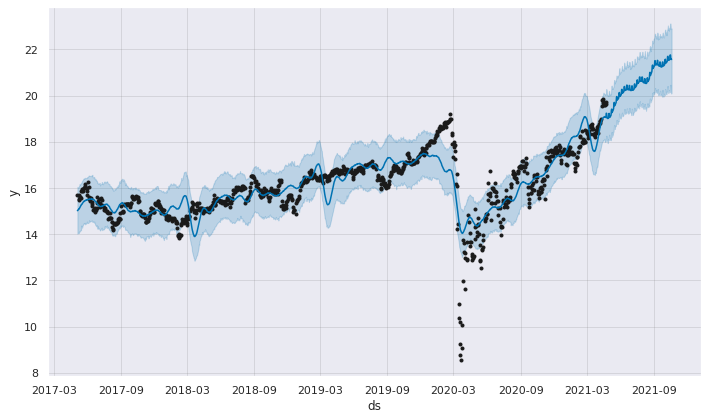

In [ ]:
# kkr real estate finance trust
make_forecast('KREF', 180)

In [ ]:
# dave & buster's
make_forecast('PLAY', 365 * 2).tail()

In [ ]:
n = 365  # set variable for number of days to predict
 
# snapchat
snap_forecast = make_forecast('SNAP', n)
 
# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)
 
snap_forecast